# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

Отправлять дз не нужно, нужно закоммитить в github. Сдается дз лично преподавателю на рубежном контроле (13 марта)

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
import importlib
importlib.import_module('mpl_toolkits').__path__
import collections as cl
import itertools as its
from numpy import linalg as la
eps = 2e-5

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Cчитываем данные, полученные в результате выполнения домашнего задания из курса введения, в `data frame` библиотеки `pandas`. Достаем координаты и конвертируем в массив `numpy`. Возможно, в собранном вами файле кодировка будет иной.

In [3]:
data_df = pd.read_csv("vk_places_datetime.csv")
data_df.head()

,Unnamed: 0,Unnamed: 0.1,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,0,0,Мячковский б-р 3а,435,1,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,1,1,Дачная 2а,14,123,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,2,2,Лени Голикова 29,8,2,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,3,3,Героев Танкограда 63,8,158,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,4,4,Мусы Джалиля 14К1,38,99,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.488720e+09


In [4]:
x_df = data_df[['latitude','longitude']].values
print x_df

[[ 55.657941  37.751574]
 [ 53.202017  50.141377]
 [ 59.843376  30.23148 ]
 ..., 
 [ 55.76363   37.597046]
 [ 56.002732  37.209755]
 [ 47.225695  39.72997 ]]


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1 Баранчиков Максим	
2 Бекбулатов Рамзан	
3 Белозёров Михаил	
4 Бобылев Владислав	
5 Брызгалов Антон	
6 Будюк Алексей	
7 Валиуллин Альберт	
8 Валиуллин Артур	
9 Васильев Евгений	
10 Галицкий Игорь	
11 Горшков Сергей	
12 Гусев Вячеслав	
13 Дегтярев Роман	
14 Дементьев Максим	
15 Елохов Артур	
16 Ефимов Владислав	
17 Зайцев Александр	
18 Ильин Иван	
19 Имеев Мерген	
20 Камалбеков Тимур	
21 Капитонов Александр	
22 Каспарьянц Георгий	
23 Кафанов Олег	
24 Клейменов Андрей	
25 Козлов Иван	
26 Колмакова Татьяна	
27 Комов Евгений	
28 Крылов Иван	
29 Кузьмина Ирина	
30 Куклева Анна	
31 Курьянов Илья	
32 Лобанов Алексей	
33 Лозинский Иван	
34 Лузин Игорь	
35 Лукьянчиков Иван	
36 Неред Максим	
37 Новикова Анастасия	
38 Новичков Сергей	
39 Омаров Темирхан	
40 Павлова Анастасия	
41 Петренко Иван	
42 Пилюгин Вадим	
43 Плошкин Александр	
44 Полякова Вера	
45 Попкова Екатерина	
46 Преображенский Анатолий	
47 Пронин Сергей	
48 Пучкин Данила	
49 Рогачев Александр	
50 Руденко Дмитрий	
51 Рыбаков Владислав	
52 Санников Артём	
53 Скиба Глеб	
54 Страдомский Сергей	
55 Тескер Константин	
56 Трифанов Петр	
57 Хапкин Артем	
58 Хорошенький Илья	
59 Чокля Дмитрий	
60 Шмурак Денис	
61 Щербакова Елена	

In [5]:
N = 48 # put your index here

In [6]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [7]:
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, k, random_state = None):
        # Колиество кластеров
        self.k = k
        self.random_state = random_state
        return
        
    def fit(self, x, y=None):
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        
        
        #for o in xrange(self.iterations):
        ok = False
        while not ok:
            try:
                # Инициализация переменных
                # Количество объектов
                self.N = len(x)
                # Количество параметров объектов
                self.M = len(x[0])
                # Количество элементов, отнесенных к кластеру
                self.Nk = np.zeros(self.k, dtype='float16')
                # Вероятности появления объектов из кластеров
                self.w = np.full(self.k, 1.0/self.k, dtype='float16')
                # Векторы средних
                self.mu = np.empty((self.k, self.M))
                for (i, j) in enumerate(np.random.choice(x.shape[0], self.k, replace=False)):
                    self.mu[i] = x[j].copy()
                # Матрицы ковариаций
                self.Sigma = np.zeros((self.k, self.M, self.M))
                for k in xrange(self.k):
                    for j in xrange(self.M):
                        self.Sigma[k,j,j] = sum([(x[i,j]-self.mu[k,j])**2 for i in xrange(self.N)])
                self.Sigma = self.Sigma/(self.N*self.k)            
                # Определители матриц ковариаций
                self.SigmaDet = np.zeros(self.k)
                # Обратные матрицы ковариаций
                self.SigmaInv = np.zeros((self.k, self.M, self.M))
                # Апостериорные вероятности
                self.aposteriori = np.zeros((self.N, self.k))
                # Полные апостериорные вероятности
                self.aposterioriFull = np.zeros(self.N)
                # Скрытые переменные
                self.gamma = np.zeros((self.N, self.k), dtype='float16')
                self.gammaold = np.ones((self.N, self.k), dtype='float16')
                # Число итераций
                self.iterations = max(int(self.N//10), 100)
                # Коэффициент для ускорения вычислений
                koef = 1.0/((2*np.pi)**(self.M/2.0))
                o = 0
                while (np.abs((self.gammaold - self.gamma)).mean() > eps) and (o < self.iterations):
                    # E-шаг
                    self.gammaold = self.gamma.copy()
                    for k in xrange(self.k):
                        self.SigmaDet[k] = koef/np.sqrt(la.det(self.Sigma[k]))
                        self.SigmaInv[k] = la.inv(self.Sigma[k])
                    for i in xrange(self.N):
                        for k in xrange(self.k):
                            # tmp = (x-m)^T
                            tmp = (x[i] - self.mu[k]).reshape(1, self.M)
                            # tmp = (x-m)^T * Sigma^-1
                            tmp = tmp.dot(self.SigmaInv[k])
                            # tmp = (x-m)^T * Sigma^-1 * (x-m)
                            tmp = tmp.dot((x[i] - self.mu[k]).reshape(self.M, 1))
                            # tmp = e^((x-m)^T * Sigma^-1 * (x-m))
                            tmp = np.exp(-0.5 * tmp)
                            # p(x|m,Sigma) = -1/2 * e^((x-m)^T * Sigma^-1 * (x-m))
                            self.aposteriori[i][k] = self.SigmaDet[k] * tmp
                        self.aposterioriFull[i] = sum([self.w[k]*self.aposteriori[i][k] for k in xrange(self.k)])
                        for k in xrange(self.k):
                            self.gamma[i][k] = self.w[k]*self.aposteriori[i][k]/self.aposterioriFull[i]

                    #M-шаг
                    for k in xrange(self.k):
                        self.Nk[k] = sum([self.gamma[i][k] for i in xrange(self.N)])
                        self.w[k] = self.Nk[k]/self.N
                        self.mu[k] = sum([self.gamma[i][k]*x[i] for i in xrange(self.N)])/self.Nk[k]
                        self.Sigma[k] = np.zeros((self.M, self.M))
                        for i in xrange(self.N):
                            tmp = (x[i]-self.mu[k]).reshape(self.M,1)
                            tmp = tmp.dot((x[i]-self.mu[k]).reshape(1, self.M))
                            self.Sigma[k] = self.Sigma[k] + self.gamma[i][k] * tmp
                        self.Sigma[k] = self.Sigma[k]/self.Nk[k]
                        
                    o = o + 1
                    if self.iterations > 150:
                        print o, np.abs((self.gammaold - self.gamma)).mean()
                    
            except la.linalg.LinAlgError as err:
                if 'Singular matrix' in err.message:
                    print 'Singular!'
            else:
                if o < self.iterations:
                    ok = True
                else:
                    print 'Long processing! Trying again'

        return self
    
    def predict(self):
        return [self.gamma[i].argmax() for i in xrange(self.N)]
    
    def fit_predict(self, x):
        self.fit(x)
        return self.predict()

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

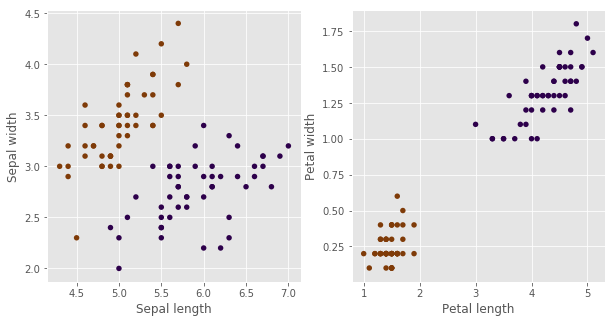

In [438]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [439]:
pred_iris = Clustering(k = 2).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [440]:
# Инерция характеризует кучность
# Силуэт характеризует компактность
# Другие характеризуют разброс и ширину, что больше подходит для географических разбросанных данных

In [441]:
# Характеризует разброс
def quality_mean_d(x, y):
    try:
        # Инициализация
        k = len(set(y))
        mxs = np.zeros(k)
        # Вычисление диаметров для кластеров
        for i in xrange(k):
            tmp = x[np.array([j == i for j in y])]
            mxs[i] = max([la.norm(j[0]-j[1]) for j in list(its.combinations(tmp, 2))])
        # Возврат среднего диаметра
        return mxs.mean()
    except ValueError:
        print 'ValueError in mean_d'
        return nan
    

In [442]:
# Характеризует ширину кластера
def quality_mean_r(x, y):
    try:
        # Инициализация
        k = len(set(y))
        mxs = np.zeros(k)
        # Вычисление радиусов по центроидам
        for i in xrange(k):
            tmp = x[np.array([j == i for j in y])]
            centroid = np.zeros(tmp.shape[1])
            for o in tmp:
                centroid = centroid + o
            centroid = centroid / len(tmp)
            mxs[i] = max([la.norm(centroid-o) for o in tmp])
        # Возврат среднего радиуса
        return mxs.mean()
    except ValueError:
        print 'ValueError in mean_r'
        return nan

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [443]:
x = x_iris.copy()

Singular!
1


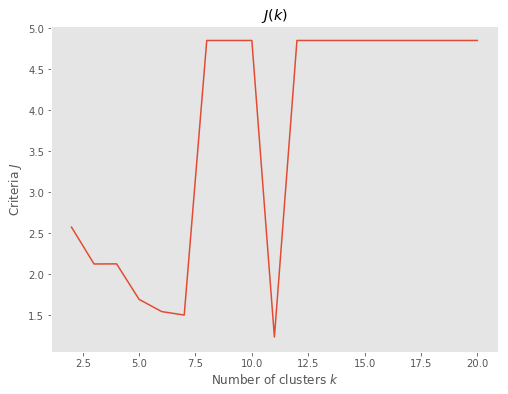

2


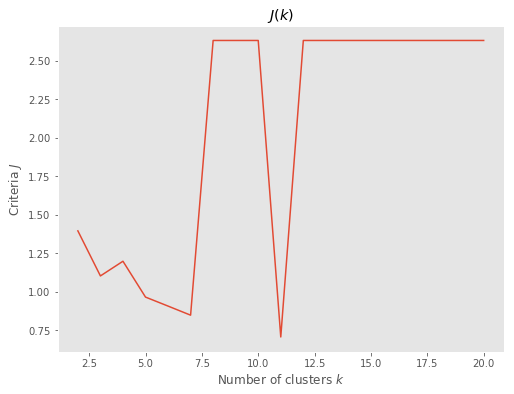

1 experiment is done
Singular!
1


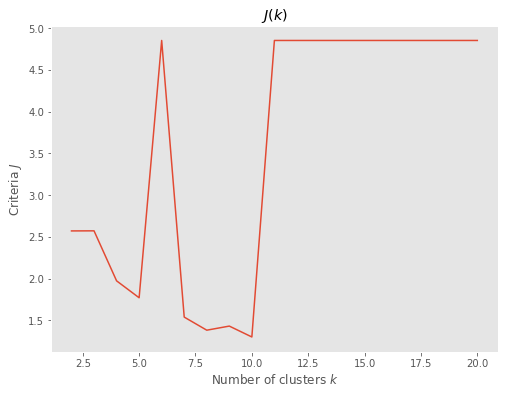

2


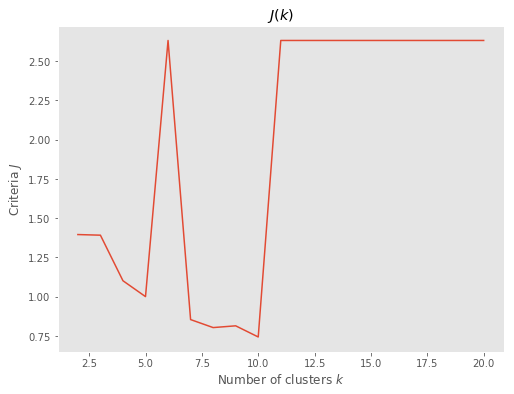

2 experiment is done
Singular!
Long processing! Trying again
Singular!
Singular!
Singular!
Singular!
1


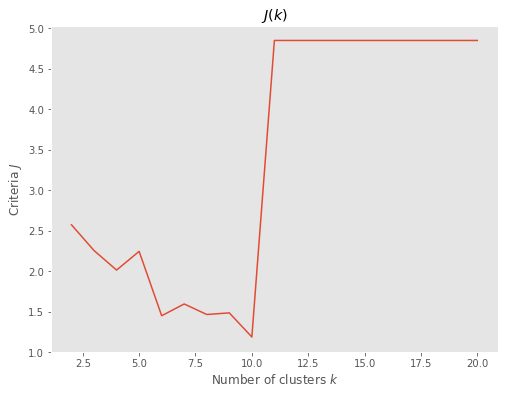

2


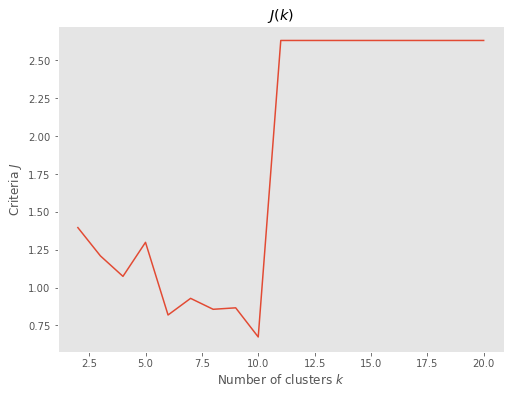

3 experiment is done
Long processing! Trying again
Long processing! Trying again
Singular!
Singular!
1


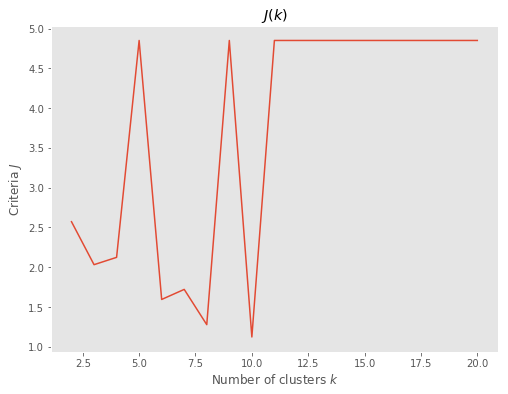

2


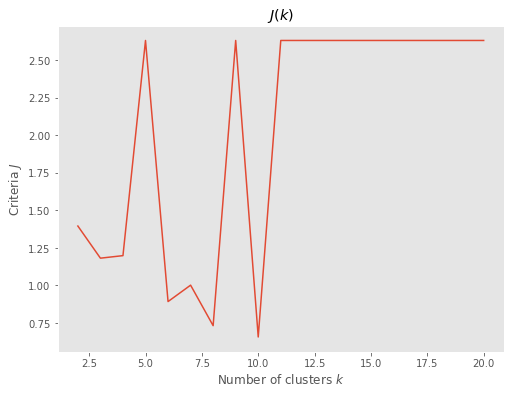

4 experiment is done
ValueError in mean_d
ValueError in mean_r
Singular!
1


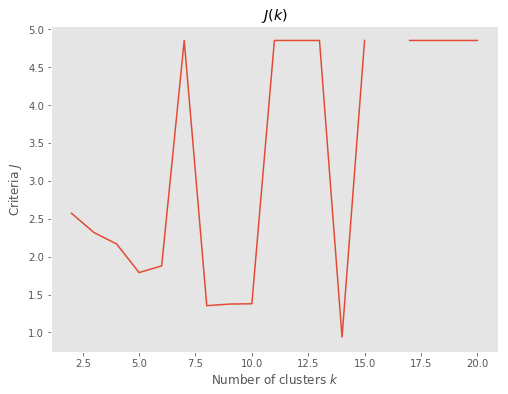

2


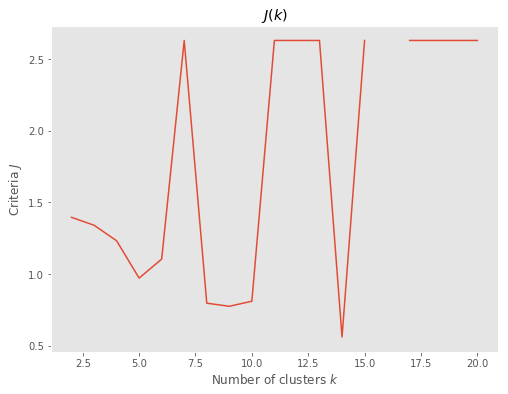

5 experiment is done


In [445]:
ks = range(2, 21)
iter = 5

for o in xrange(iter):
    criteria1 = np.zeros(len(ks))
    criteria2 = np.zeros(len(ks))
    for i, k in enumerate(ks):
        cls = Clustering(k)
        #print k
        y = cls.fit_predict(x)
        #print 'predicted'
        criteria1[i] = quality_mean_d(x, y)
        #print 'crit1 done'
        criteria2[i] = quality_mean_r(x, y)
        #print 'crit2 done'
        #print k, 'is done'
        
    print 1
    pl.figure(figsize=(8, 6))
    pl.plot(ks, criteria1)
    pl.title("$J(k)$")
    pl.ylabel("Criteria $J$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()
    print 2
    pl.figure(figsize=(8, 6))
    pl.plot(ks, criteria2)
    pl.title("$J(k)$")
    pl.ylabel("Criteria $J$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()
    print o+1, 'experiment is done'

In [411]:
# по второму и третьему критериям следует взять число кластеров:
# первое испытание - 11
# второе испытание - 10
# третье испытание - 10
# четвертое испытание - 10
# пятое испытание - 9
# Итого следует использовать 10 кластеров

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время. 

In [22]:
k = 10
cls = Clustering(k)
y = cls.fit_predict(x_df)

1 0.099976
2 0.038147
3 0.018784
4 0.019119
5 0.016556
6 0.0089645
7 0.0091858
8 0.0089111
9 0.0081329
10 0.0060196
11 0.0038357
12 0.0025768
13 0.0020008
14 0.0017166
15 0.0015278
16 0.001461
17 0.0013866
18 0.0013638
19 0.0013685
20 0.0014248
21 0.0015697
22 0.0016603
23 0.0017471
24 0.001709
25 0.0016336
26 0.0014963
27 0.0012999
28 0.001174
29 0.0010691
30 0.0010185
31 0.0010405
32 0.0010042
33 0.001009
34 0.0010252
35 0.00097847
36 0.00093508
37 0.00088263
38 0.0008173
39 0.00075054
40 0.00071001
41 0.00067759
42 0.00058699
43 0.0005517
44 0.00050926
45 0.00045776
46 0.00045061
47 0.00042176
48 0.00038719
49 0.00038099
50 0.00033689
51 0.00033164
52 0.00032401
53 0.00029206
54 0.00028157
55 0.00025535
56 0.00028753
57 0.00026512
58 0.0002625
59 0.00026989
60 0.00026417
61 0.00025082
62 0.00022364
63 0.00021911
64 0.00022614
65 0.00021482
66 0.00021207
67 0.0002073
68 0.00021327
69 0.00020146
70 0.00018907
71 0.00019622
72 0.00018513
73 0.00019002
74 0.0001899
75 0.00017858
76 0.00

In [54]:
c = cl.Counter(y)
print c

Counter({3: 1479, 6: 1166, 4: 717, 7: 541, 5: 447, 1: 301, 9: 163, 2: 138, 8: 48})


Визуализируем кластеризацию на карте

In [34]:
print min(x_df[:, 0]) - 5
print max(x_df[:, 0]) + 5 
print min(x_df[:, 1]) - 5 
print max(x_df[:, 1]) + 5 

23.37857
74.066435
-3.305903
136.922657


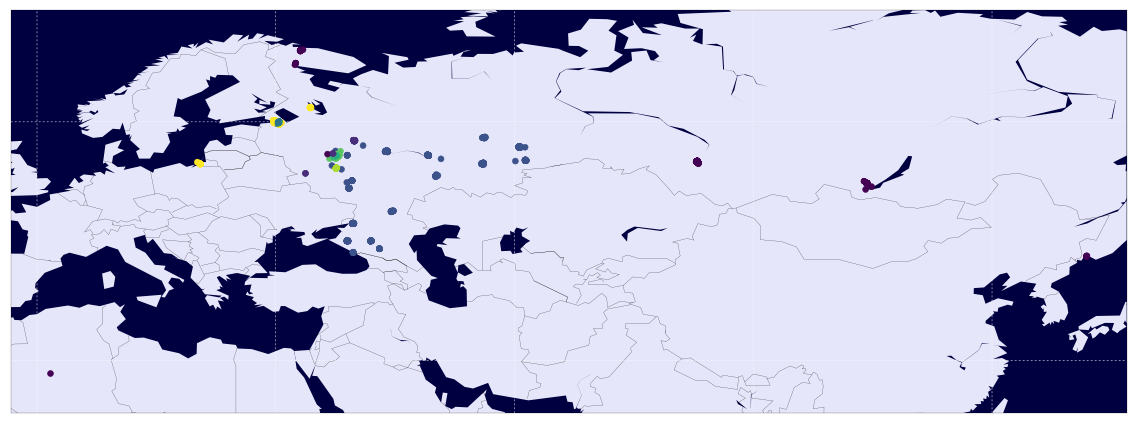

In [93]:
# Ничего не видно! Увеличим
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', 
               llcrnrlat=min(x_df[:, 0]) - 5, urcrnrlat=max(x_df[:, 0]) + 5, 
               llcrnrlon=min(x_df[:, 1]) - 5, urcrnrlon=max(x_df[:, 1]) + 5, 
               resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=10)
    
pl.show()

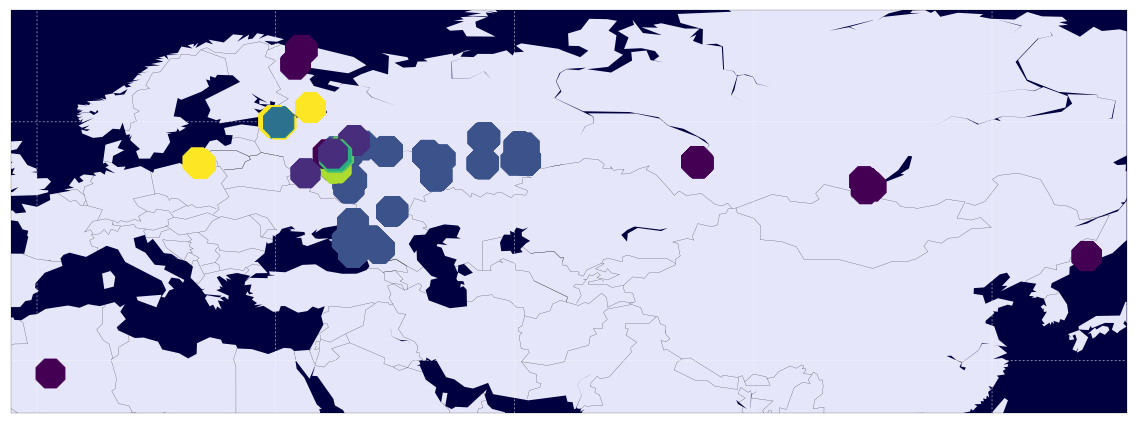

In [92]:
# Неадекватная реакция на пурпурные объекты (причем есть один в рядом с Москвой). Рассмотрим центр РФ
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', 
               llcrnrlat=min(x_df[:, 0]) - 5, urcrnrlat=max(x_df[:, 0]) + 5, 
               llcrnrlon=min(x_df[:, 1]) - 5, urcrnrlon=max(x_df[:, 1]) + 5, 
               resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=100, marker="8", s = 1000)
    
pl.show()

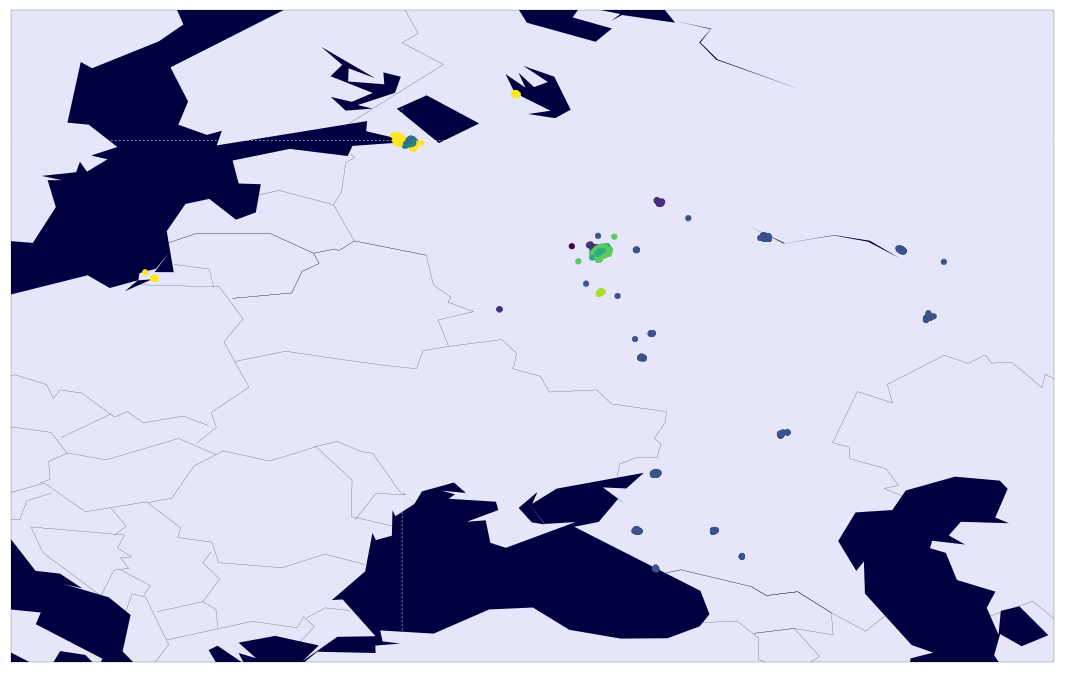

In [111]:
# Опять не очень видно, увеличим
pl.figure(figsize=(20,12))
s = 40 
n = 65 
w = 15 
e = 55
pl.figure(figsize=(20,12))
m = bm.Basemap(projection='cyl', llcrnrlat=s, urcrnrlat=n, llcrnrlon=w, urcrnrlon=e, resolution='c')
m.drawcountries(linewidth=0.2) 
m.fillcontinents(color='lavender', lake_color='#000040') 
m.drawmapboundary(linewidth=0.2, fill_color='#000040') 
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5) 
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=100, marker="8")
pl.show()

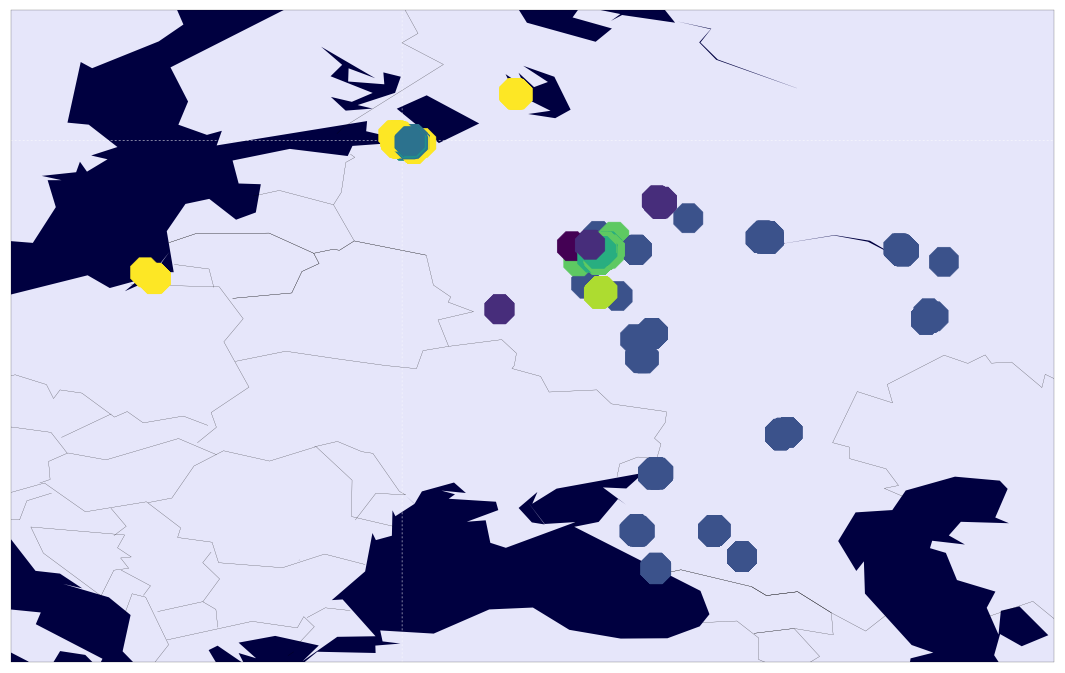

In [109]:
# Можно выделить синий кластер центральной и южной РФ, который, тем не менее, заходит очень близко к Москве
# Также можно выделить желтый кластер, но который заходит очень близко к Санкт-Петербургу
# Наблюдается фиолетовый (не пурпурный) кластер странным образом раскинутый недалеко от Москвы
# Рассмотрим поближе регионы Москвы и Санкт-Петербурга, чтобы определить характер нахождения там объектов:
# Фиолетовых, пурпурных, желтых, синих
pl.figure(figsize=(20,12))
s = 40 
n = 65 
w = 15 
e = 55
pl.figure(figsize=(20,12))
m = bm.Basemap(projection='cyl', llcrnrlat=s, urcrnrlat=n, llcrnrlon=w, urcrnrlon=e, resolution='c')
m.drawcountries(linewidth=0.2) 
m.fillcontinents(color='lavender', lake_color='#000040') 
m.drawmapboundary(linewidth=0.2, fill_color='#000040') 
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5) 
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=100, marker="8", s = 1000)
pl.show()

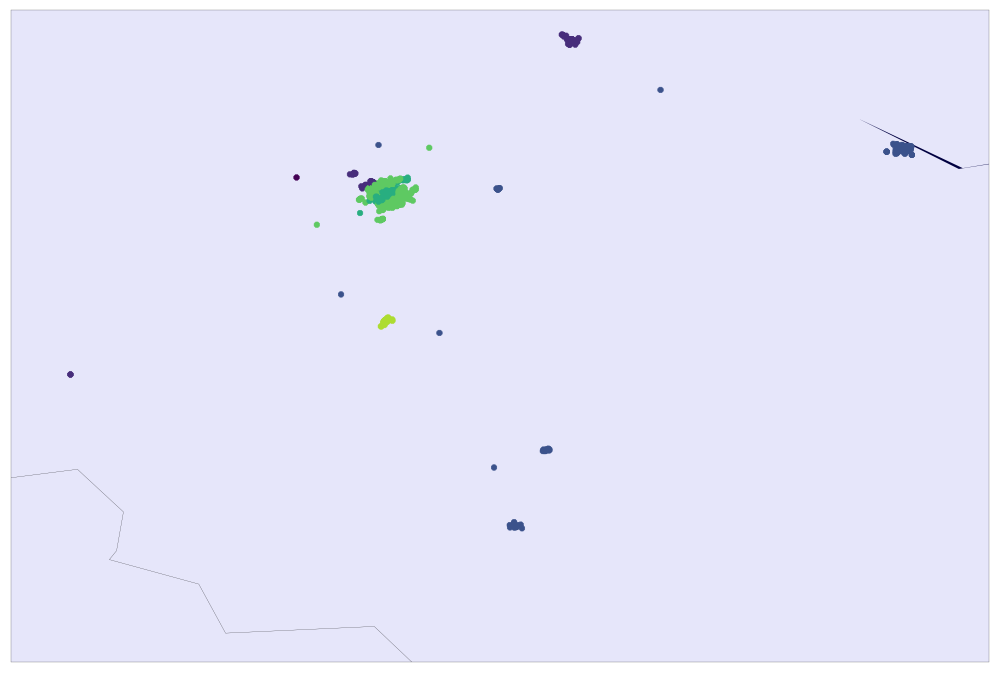

In [132]:
# Москва
pl.figure(figsize=(20,12))
s = 50
n = 58
w = 33
e = 45
pl.figure(figsize=(20,12))
m = bm.Basemap(projection='cyl', llcrnrlat=s, urcrnrlat=n, llcrnrlon=w, urcrnrlon=e, resolution='c')
m.drawcountries(linewidth=0.2) 
m.fillcontinents(color='lavender', lake_color='#000040') 
m.drawmapboundary(linewidth=0.2, fill_color='#000040') 
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5) 
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=100, marker="8")
pl.show()

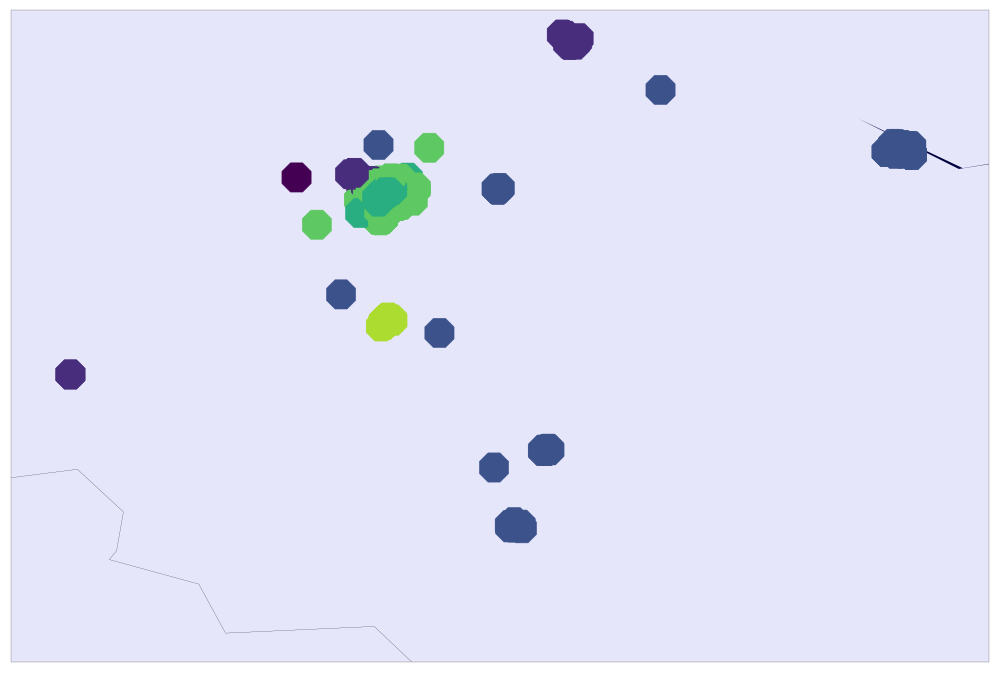

In [133]:
# Пурпурный объект стоит на каком-то расстоянии от Москвы, но всё равно слишком близко к ней относительно остальных объектов
# Возможно, это всего лишь погрешность. По-другому объяснить такое поведение не могу
# Фиолетовый кластер все еще распределен странно, стоит рассмотреть подробнее внутри Москвы
# Синий кластер оказался достаточно адекватным, не удвитиельно что между его объектами находится салатовый кластер и Москва,
# так как салатовый кластер достаточно кучный. Собственно, выделился четко салатовый кластер - какой-то город подмосковья (Тула)
# Все еще неясно поведение Фиолетового кластера, рассмотрим ближе Москву
pl.figure(figsize=(20,12))
s = 50
n = 58
w = 33
e = 45
pl.figure(figsize=(20,12))
m = bm.Basemap(projection='cyl', llcrnrlat=s, urcrnrlat=n, llcrnrlon=w, urcrnrlon=e, resolution='c')
m.drawcountries(linewidth=0.2) 
m.fillcontinents(color='lavender', lake_color='#000040') 
m.drawmapboundary(linewidth=0.2, fill_color='#000040') 
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5) 
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=100, marker="8", s = 1000)
pl.show()

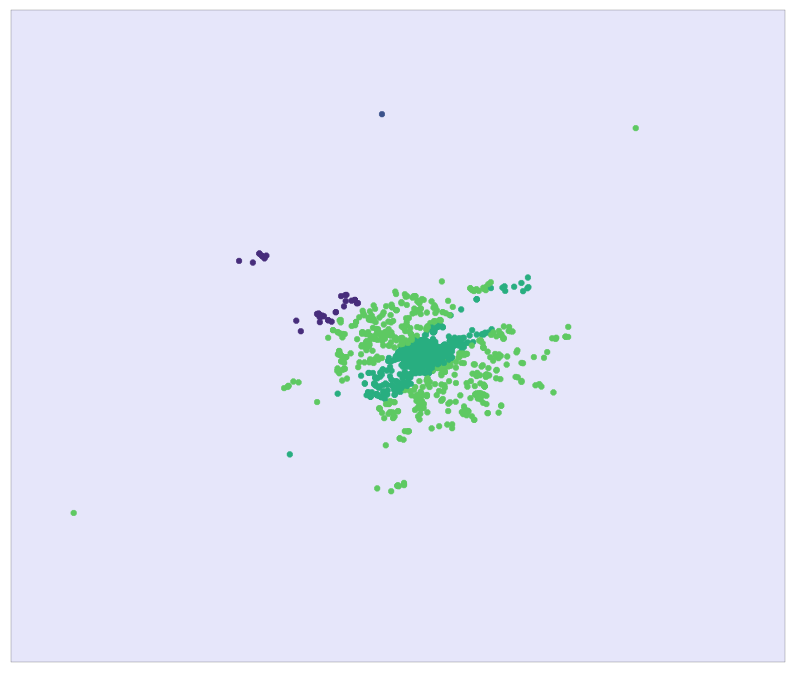

In [160]:
pl.figure(figsize=(20,12))
s = 55
n = 56.6
w = 36.6
e = 38.5
pl.figure(figsize=(20,12))
m = bm.Basemap(projection='cyl', llcrnrlat=s, urcrnrlat=n, llcrnrlon=w, urcrnrlon=e, resolution='c')
m.drawcountries(linewidth=0.2) 
m.fillcontinents(color='lavender', lake_color='#000040') 
m.drawmapboundary(linewidth=0.2, fill_color='#000040') 
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5) 
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=100, marker="8")
pl.show()

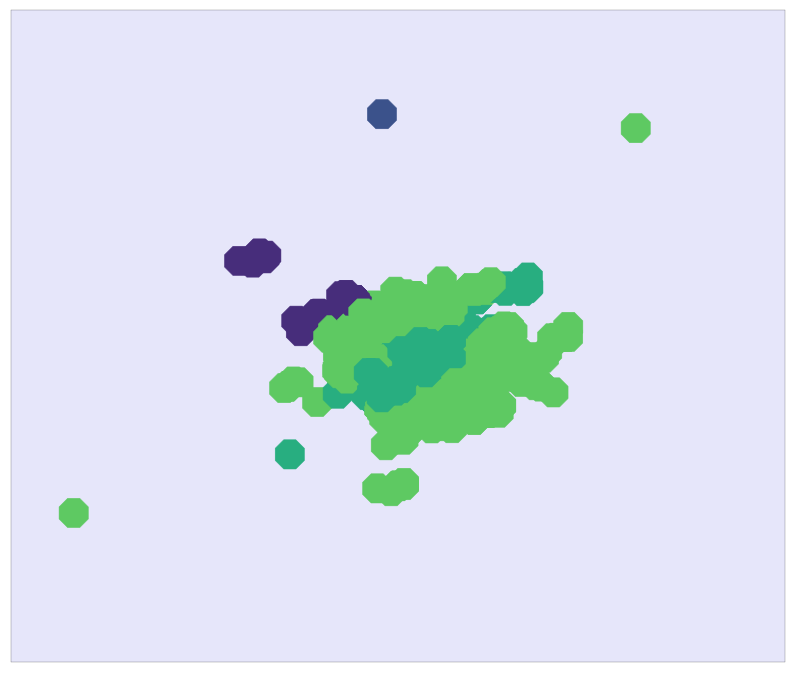

In [161]:
# Фиолетовый кластер - Северо-Запад Москвы, но имеет в себе и некоторую часть центра РФ (описано выше). Поведение странное
# Аналогично странно разделение самых Москвы на 2 кластера, один из которых разделяет другой
pl.figure(figsize=(20,12))
s = 55
n = 56.6
w = 36.6
e = 38.5
pl.figure(figsize=(20,12))
m = bm.Basemap(projection='cyl', llcrnrlat=s, urcrnrlat=n, llcrnrlon=w, urcrnrlon=e, resolution='c')
m.drawcountries(linewidth=0.2) 
m.fillcontinents(color='lavender', lake_color='#000040') 
m.drawmapboundary(linewidth=0.2, fill_color='#000040') 
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5) 
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=100, marker="8", s = 1000)
pl.show()

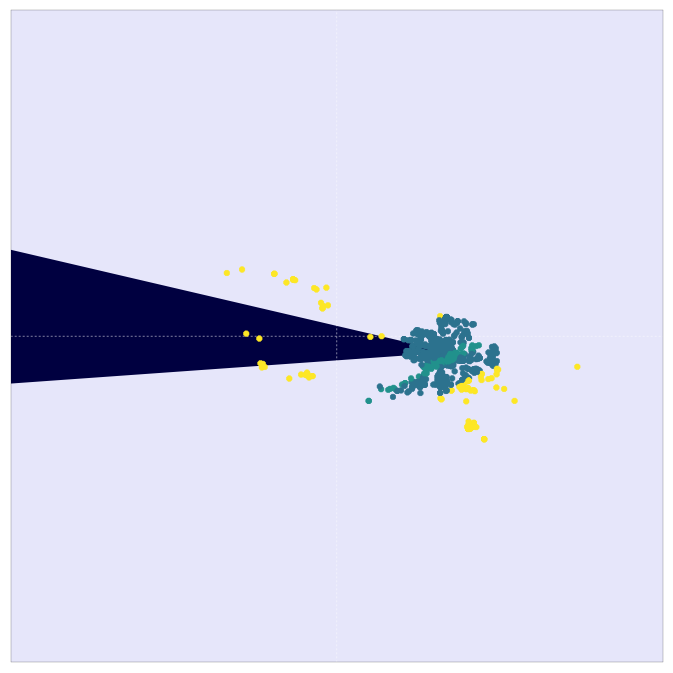

In [175]:
# Санкт-Петербург
# Можно наблюдать аналогичную картину, однако теперь становится понятным что есть желтый (и выше фиолетовый) кластер
# Это кластер окрестности вокруг очень кучных кластеров, то есть кучные кластеры выделяются внутри менее кучных
# Однако в центре Санкт-Петербурга ситуация аналогична Москве
pl.figure(figsize=(20,12))
s = 59 
n = 61
w = 29 
e = 31
pl.figure(figsize=(20,12))
m = bm.Basemap(projection='cyl', llcrnrlat=s, urcrnrlat=n, llcrnrlon=w, urcrnrlon=e, resolution='c')
m.drawcountries(linewidth=0.2) 
m.fillcontinents(color='lavender', lake_color='#000040') 
m.drawmapboundary(linewidth=0.2, fill_color='#000040') 
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5) 
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.scatter(x_df[:, 1], x_df[:, 0], c=y, zorder=100, marker="8")
pl.show()

Какой вывод можно сделать о качестве кластеризации?

In [176]:
# Итого можно сделать вывод о том, что меньшем числе кластеров кластеризация была бы более адекватной.
# Скорее всего стоило замерять качество кластеризации с помощью алгоритма Silhoette или суммы квадратов,
# так как они характеризуют кучность и связность, что важно при кластеризации таких географических данных
# Однако большая часть кластеризации отработала адекватно и при 10 кластерах.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.

In [ ]:
# СПАСИБО